# Start Here - Twin Paradox tutorial

The [twin paradox](https://en.wikipedia.org/wiki/Twin_paradox) is a classic example of the strange consequences of special relativity.

Take two twins living on Earth, Alice and Bob. Alice is an astronaut and she is about to make the first ever journey to the [Alpha Centauri](https://en.wikipedia.org/wiki/Alpha_Centauri) star system, the Solar system's closest neighbor. She travels in a new kind of spacecraft that can travel at extremely high speeds. She will make the journey to Alpha Centauri, take a few scientific measurements, set up a few satellites, and then she'll start heading right back to Earth within a few days. Bob stays on Earth during this whole time. Alice's spacecraft has enough fuel to let her travel at a maximum speed of 0.7 light-years per year with respect to Earth on both legs of her trip.

## Approximations

Let's make some approximations to simplify the scenario. We can ignore the few days that Alice spends at Alpha Centauri, since it's not much time compared to the years her whole trip will take. We can also assume that the spacecraft accelerates quickly enough that we can just approximate the velocity changes to be instantaneous. Also, Alpha Centauri is currently moving away from our Solar system at about 21.4 km per second. This is only about `1.98e-8` times the speed of light, so we can ignore this and approximate that Bob, Earth, and Alpha Centauri are all at rest with respect to each other.

## Quantify

We can find quantities to describe the whole scenario from Bob's perspective. Alpha Centauri is about `dist = 4.367` light-years away from Earth. The spacecraft travels at `speed = 0.7` light-years per year. So each leg of Alice's trip takes ` dist / speed  = 6.238` years of coordinate time in Bob's frame of reference. The entire trip takes `total_time = 2 * dist / speed = 12.477` years.

Let's find out the important points in coordinate time and space in Bob's frame of reference--the starting points of Alice and Bob, the midpoint of Alice's journey when she reaches Alpha Centauri, and the ending points of Alice and Bob. We'll use `t` to represent time, in years, and `x` to represent distance, in light-years.

Alice starts moving in a straight line toward Alpha Centauri at `(t = 0 , x = 0)`. She reaches Alpha Centauri at `(t = total_time / 2 , x = dist)`. Then she turns around toward Earth again and travels in a straight line to arrive back home at `(t = total_time ,  x = 0)`.

Bob stays at `x = 0` the whole time, so his path is a straight line between `(t = 0, x = 0)` and `(t = total_time, x = 0)`.

We'll also throw in a line that represents the position of Alpha Centauri, which stays fixed at `x = dist`. I'm going to choose to draw this line between `(t = -10_000, x = dist)` and `(t = 10_000, x = dist)` so that it'll be long enough to always be displayed within the plots that we'll draw.

## Plot it

Let's use SpacetimeLib and [Matplotlib](https://matplotlib.org/) to define and draw a plot of the paths of Alice, Bob, and Alpha Centauri through spacetime.

In [1]:
import spacetime as st
import matplotlib.pyplot as plt

In special relativity, we call the path that a particle takes through spacetime a [worldline](https://en.wikipedia.org/wiki/World_line). SpacetimeLib has an object called `spacetime.Worldline` to represent the worldline of a particle. We have to give it a list of the points in spacetime that the partcle travels through, and SpacetimeLib will draw straight lines through those points.

In [2]:
dist = 4.367
speed = 0.7
total_time = 2 * dist / speed

alice_0 = st.Worldline([
    # (t, x)
    (0, 0),
    (total_time / 2, dist),
    (total_time, 0)
])

bob_0 = st.Worldline([
    (0, 0),
    (total_time, 0)
])

alpha_centauri_0 = st.Worldline([
    (-10000, dist),
    (10000, dist)
])

I put `_0` on these variable names. This is to keep track of which reference frame the worldline is drawn in. `_0` will refer to Bob's frame.

Let's create a plotting function that displays each worldline in the same plot. If you're not familiar with Matplotlib, don't worry about understanding it right now--there are [great tutorials](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) for it that you can check out later.

In [3]:
def plotter(ax, w, label):
    out = ax.plot(*w.plot(), label=label, marker='.')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('t-axis')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return out

Plot the worldlines.

(0.0, 14.0)

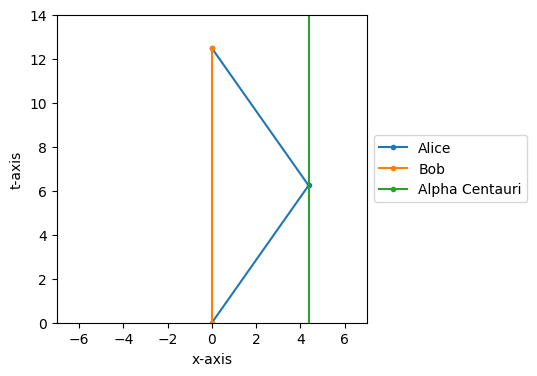

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

plotter(ax, alice_0, "Alice")
plotter(ax, bob_0, "Bob")
plotter(ax, alpha_centauri_0, "Alpha Centauri")

ax.set_xlim(-7, 7)
ax.set_ylim(0, 14)

## How much time does the trip take for Alice?

If you're not familiar with special relativity, you might think that Alice experiences the same amount of time across her journey as Bob does.

In [Newtonian physics](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion), [time is universal](https://en.wikipedia.org/wiki/Absolute_space_and_time), meaning that time always marches forward at the same rate in every possible reference frame. One second for you is the same as one second for me, no matter what our relative velocities are. Intuitively, we always assume this in everyday life.

Well, in special relativity, that's not true. Alice actually experiences less time passing during her trip than Bob does. When Alice and Bob meet up after her journey to celebrate her return, Bob is older than Alice. This concept is called [time dilation](https://en.wikipedia.org/wiki/Time_dilation), and the amount of time that a person or object experiences between two points along their path of motion is called [proper time](https://en.wikipedia.org/wiki/Proper_time). This is the heart of the twin paradox.

I won't explain why this is the case, but I will show you how to calculate the amount of time that passes for Alice.


`spacetime.Worldline` has a function `spacetime.Worldline.proper_time_delta()`, which can calculate this for us. We have to give it two time coordinates between which to calculate the proper time. Let's see how much time Alice and Bob both experience from the beginning to the end of Alice's journey.

In [5]:
bob_0.proper_time_delta(0, total_time)

12.477142857142859

Not surprisingly, Bob experiences 12.477 years of time, since we defined the problem from his perspective. But what about Alice?

In [6]:
alice_0.proper_time_delta(0, total_time)

8.910462270699037

Alice experiences 8.91 years of time over her whole journey, which is significantly less time than Bob experiences. They are twins, so they were the same age before Alice left, but she'll be about 3.5 years younger than Bob after the journey.

## Different reference frames

We can choose to view this scenario from different reference frames. What paths of motion do Alice, Bob, and Alpha Centauri take from Alice's perspective?

We can use `Worldline.boost()` to find out. "Boosting" a worldline means applying a [Lorentz transformation](https://en.wikipedia.org/wiki/Lorentz_transformation) to it to find out how to describe the same worldline in a different reference frame moving at a different constant speed. We'll boost the worldlines by the speed of Alice's spacecraft. This will give us the worldlines in Alice's reference frame during the first half of her journey.

In [7]:
alice_1 = alice_0.boost(speed)
bob_1 = bob_0.boost(speed)
alpha_centauri_1 = alpha_centauri_0.boost(speed)

I named these variables with `_1` to for this new reference frame. Let's plot them.

(0.0, 20.0)

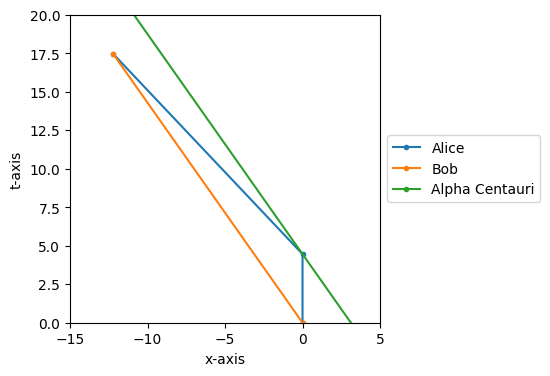

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

plotter(ax, alice_1, "Alice")
plotter(ax, bob_1, "Bob")
plotter(ax, alpha_centauri_1, "Alpha Centauri")

ax.set_xlim(-15, 5)
ax.set_ylim(0, 20)

Here we see that Alice stays at rest during the first half of her journey, which is what we would expect. Bob is traveling away from alice, which we also would expect. We also see Alpha Centauri traveling toward Alice until she reaches it. Then Alice turns around and heads toward home again.

TODO: Show how to calculate the velocities and how to get the vertices, once those APIs exist.